In [1]:
'''
Author:  Areg Danagoulian
date: 09.16.2024
License: see README

This is a basic notebook for reading in the output of grasshopper and plotting the output.
The input is in .dat format.
'''

import csv
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator
#%matplotlib notebook

In [2]:
#Here we read in the grasshopper output file, and fill a number of numpy arrays with the various columns
file_path = 'test.dat'
#E_beam=np.array([])
E_beam=[]
E=[]
EventID=[]
ParticleName=[]
CreatorProcessName=[]
Time=[]#in nanoseconds
detector_number=[]


# Open the file and specify the tab delimiter
with open(file_path, 'r', newline='') as file:
    # Create a CSV reader with tab delimiter
    reader = csv.reader(file, delimiter='\t')

    # Skip the first line
    next(reader, None)

    # Iterate through the remaining lines
    for row in reader:
        # Access the columns as elements of the 'row' list
        # For example, to access the first column:
        # column1 = row[0]
        # To access the second column:
        # column2 = row[1]
        # ...and so on

        # You can process the data or print it as needed
#        print(row)
        #E_beam=np.append(E_beam,float(row[0])) #this is the original energy of the original particle in the event
        E_beam.append(float(row[0]))
        E.append(float(row[1])) #this is the energy of the particle when it hits your detector
        EventID.append(float(row[2]))  #the number of the event
        ParticleName.append(row[3]) #a string which says what particle this is, e-, gamma, etc...
        CreatorProcessName.append(row[4]) #who created this particle...it may be a secondary
        Time.append(float(row[5])) #time in nanoseconds from the initiation of the event
        detector_number.append(float(row[6])) #which number detector detected this particle
        
E_beam = np.array(E_beam)
E = np.array(E)
EventID = np.array(EventID)
ParticleName = np.array(ParticleName)
CreatorProcessName = np.array(CreatorProcessName)
Time = np.array(Time)
detector_number = np.array(detector_number)

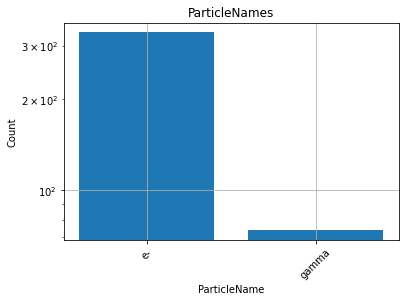

In [3]:
#this is an example of one way for histograming a string array...it's a bit long an painful
string_histogram = {}
for string in ParticleName:
    if string in string_histogram:
        string_histogram[string] += 1
    else:
        string_histogram[string] = 1

# Extract the unique strings and their frequencies
unique_strings = list(string_histogram.keys())
frequencies = list(string_histogram.values())

# Create a bar chart (histogram)
plt.bar(unique_strings, frequencies)
plt.xticks(rotation=45)
plt.grid('on')
plt.yscale('log')
plt.xlabel('ParticleName')
plt.ylabel('Count')
plt.title('ParticleNames')
plt.show()

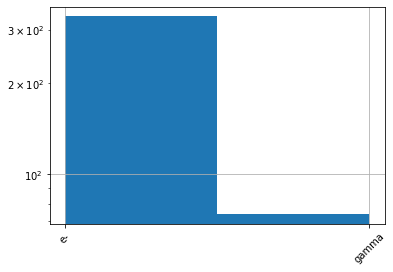

In [4]:
# a MUCH simpler way of histograming a string array 
plt.hist(ParticleName,bins=len(np.unique(ParticleName)))
plt.xticks(rotation=45)
plt.grid('on')
plt.yscale('log')
plt.show()

In [5]:
len(np.unique(ParticleName))

2

In [6]:
# We want to know which particles were created by which processes

# Start off by creating a dictionary to count occurrences of string pairs
histogram = {}
for x, y in zip(CreatorProcessName, ParticleName): #you can change this for other string arrays...
    pair = f"{x}-{y}"
    if pair in histogram:
        histogram[pair] += 1
    else:
        histogram[pair] = 1

# Print the 2D histogram-like representation
for x in np.unique(CreatorProcessName):#["eIoni", "eBrem", "EventGenerator"]: 
    for y in np.unique(ParticleName):#["e-", "gamma"]:
        pair = f"{x}-{y}"
        count = histogram.get(pair, 0)
        print(f"{pair}: {count}", end="\t\t\t")
    print()


EventGenerator-e-: 329			EventGenerator-gamma: 0			
eBrem-e-: 0			eBrem-gamma: 74			
eIoni-e-: 2			eIoni-gamma: 0			
phot-e-: 1			phot-gamma: 0			


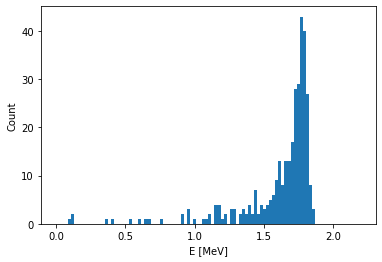

In [7]:
#finally, let's look at energy distributions
plt.hist(E[ParticleName=='e-'], bins=100,range=(0,2.2))  # Adjust the number of bins and range as needed.  Here we histogram the energy of ONLY electrons
#plt.yscale('log')
plt.xlabel('E [MeV]')
plt.ylabel('Count')
#plt.title('Number Histogram')
plt.show()